# A web-based Deep Learning prediction model for rideshare demand based on weather conditions

Behzad Asadieh PhD

basadieh@sas.upenn.edu   |   github.com/behzadasd

Major rideshare platforms such as Uber and Lyft implement pricing schemes such as surge pricing and prime time, where passengers pay a higher rate for the ride during times of high demand; this higher pricing scheme incentivizes the drivers to provide service in inclement conditions in order to meet the ride request demand. Here, I propose to develop a web-based Deep Learning prediction model that uses real-time weather condition data and weather forecast to predict the change in rideshare demand in different locations of the city. The model will be trained based on non-weather-related variables affecting the demand such as day of the weak, hour of day, public events, city hotspots, and will project the changes in demand based on changes in weather conditions compare to normal baseline demand. The model can be used to calculate the price surges based on projected demand, ahead of time, and inform the rideshare platform and drivers of increased profit opportunities in certain times/locations.

For the purpose of preliminary data exploration, a sample data of 693000 Uber and Lyft rides and associated weather data for Boston, MA is analyzed here. However, for the capstone project, I propose to use a larger dataset obtained from Uber and Lyft for multiple major US cities, as well as weather data from NOAA, to develop the proposed prediction model. For real-time weather data, I’ll use the hourly data from ClimaCell’s weather API (www.climacell.co/weather-api/). The free tier subscription allows access to 1000 calls per day (100/hour limit), which is enough for the purpose of this project. I will develop a web-based model to obtain location-based real-time weather data and hourly forecasts ClimaCell’s weather API and use the information as inputs to the predictive model to forecast the ride demand over the coming hours.

### Exploratory Analysis:
For initial exploratory purposes, I use Uber and Lyft rideshare dataset for Boston, MA From 11-26-2018 to 12-18-2018. The dataset contains 693000 data points and contains ride information such as ride time, ride source and destination, ride type (shared, regular X, luxury, SUV, etc), and price surge multiplier. The dataset also includes weather information at the time of ride request. The weather features include: temperature, precipitation intensity, humidity, cloud cover, descriptive weather conditions (rainy, sunny, overcast, drizzle, ect), as well as the coordinates (latitude-longitude) of the ride’s source.
The preliminary exploratory analysis shows that the number of rides during the cloudy and overcast weather conditions is the highest, compared to clear weather conditions. Price surge multipliers are also highest during the cloudy conditions, which shows that the rideshare platforms are met with higher demand and hence increase the ride fares. The temperature histogram also shows that there’s a clear peak in the number of rides associated with certain temperature intervals. However, in order to correlate temperature and ride numbers, we would need a broader data samples that cover all months of the year, since the current dataset only covers November and December rides.
The data in current format is associated for each individual ride. In order to create a time series dataset for the exploration and correlation analysis, I created a new dataset, where all the ride and weather information are aggregated for each one-hour periods, so the change in patterns of different features can be tracked. For each 1-hour timeframe, number of rides during the period is counted. The price and surge multipliers are averaged during each period to calculate the average price per hour. Numerical weather information such as temperature, precipitation intensity, humidity, dew point, wind speed, cloud coverage, UV index, ect. are also averaged per each period. For categorical features such as descriptive weather conditions, the weather conditions with the highest number of occurrences during each period is selected as the dominant weather condition of that period. 
The new aggregated data shows that number of rides per hour has the highest correlation with wind speed and air pressure. Precipitation intensity and cloud cover have also high correlation with the number of rides. However, changes in wind speed and air pressures can be explained by changes in precipitation, since the rainy weather is normally associate with higher wind speeds and low air pressure. 
I will perform a broader exploratory analysis to identify the weather features that have the highest correlation with the ride demand and price surges. I will obtain a larger ride dataset from Uber and Lyft platforms to be used for training the predictive model. Hourly weather information is also publicly available through NOAA website, which can be obtained and paired with the associated ride information for each time period. In the next step, I’ll develop and train a Deep Learning Neural Network model using Keras to predict the ride demand based on the selected weather inputs. After developing the predictive model, I will develop a web-based model to obtain location-based real-time weather data and hourly forecasts ClimaCell’s weather API and use the information as inputs to the predictive model to forecast the ride demand over the next hours.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
Rides = pd.read_csv('Uber_Lyft_Boston/rideshare_kaggle.csv')

In [5]:
Rides.head().transpose()

,0,1,2,3,4
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a
timestamp,1.54495e+09,1.54328e+09,1.54337e+09,1.54355e+09,1.54346e+09
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft


In [6]:
Rides['datetime_new'] = pd.to_datetime(Rides['datetime'])
Rides['datetime_new'] = Rides['datetime_new'].apply(lambda date: date.dayofweek)
Rides['DayOfWeek'] = Rides['datetime_new'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
Rides.drop('datetime_new',axis=1,inplace=True)

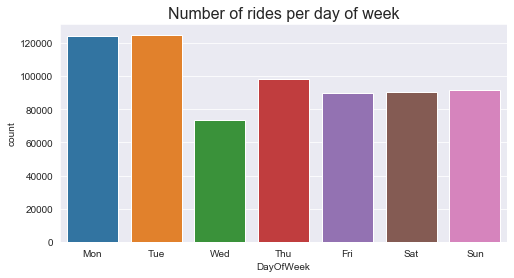

In [7]:
plt.figure(figsize=(8,4))
plt.title('Number of rides per day of week', fontsize=16)
sns.countplot(x='DayOfWeek', data=Rides, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

In [8]:
Rides['short_summary'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [9]:
order_w=[' Overcast ', ' Mostly Cloudy ', ' Partly Cloudy ', ' Clear ',
         ' Rain ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ', ' Drizzle ']

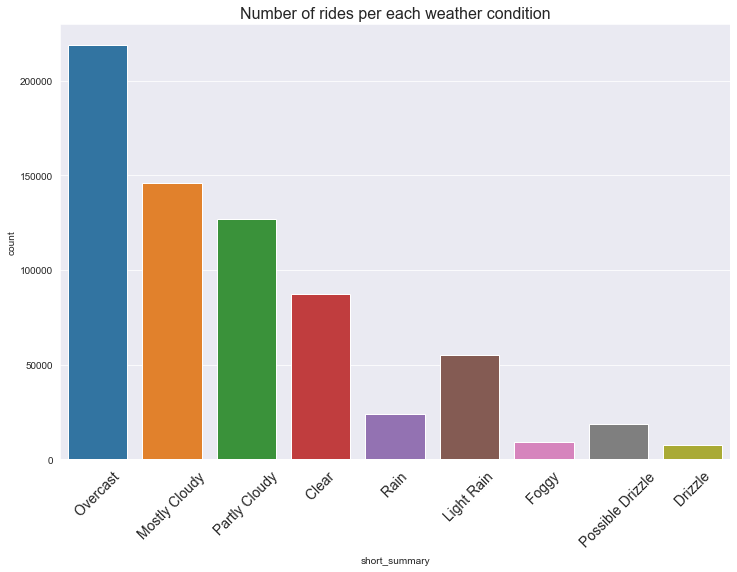

In [10]:
plt.figure(figsize=(12,8))
plt.title('Number of rides per each weather condition', fontsize=16)
plt.xticks(rotation=45, fontsize=14) 
sns.countplot(x='short_summary', data=Rides, order=order_w)

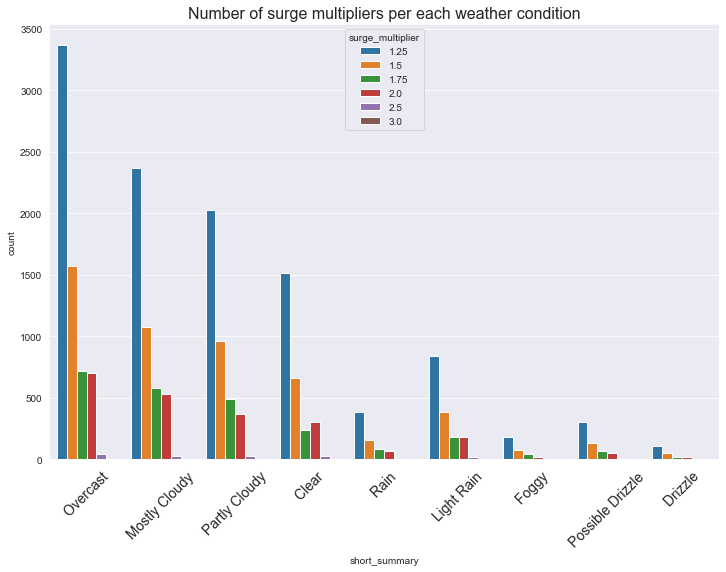

In [11]:
plt.figure(figsize=(12,8))
plt.title('Number of surge multipliers per each weather condition', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
sns.countplot(x='short_summary', data=Rides[Rides['surge_multiplier'] > 1], hue='surge_multiplier',order=order_w)

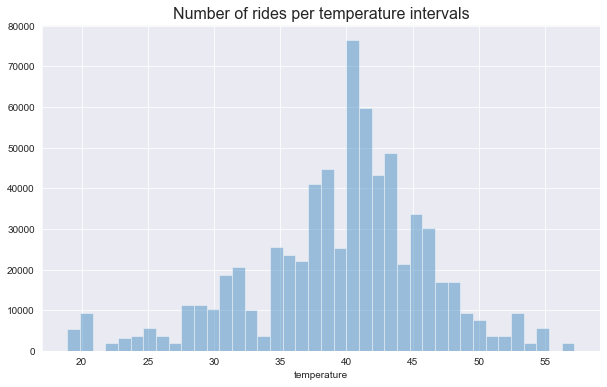

In [12]:
plt.figure(figsize=(10,6))
plt.title('Number of rides per temperature intervals', fontsize=16)
sns.distplot(Rides['temperature'],kde=False, bins=40)

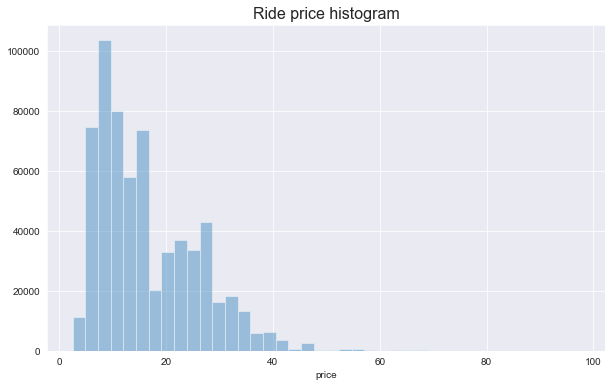

In [13]:
plt.figure(figsize=(10,6))
plt.title('Ride price histogram', fontsize=16)
sns.distplot(Rides['price'],kde=False, bins=40)

## Creating a new aggregated hourly dataset

In [14]:
Rides['hours_index']=Rides['datetime'].apply(lambda text: text[0:13])

In [15]:
Rides_hourly = pd.DataFrame(data=Rides.groupby('hours_index').count()['id'])
Rides_hourly.reset_index(inplace = True) 
Rides_hourly.columns=['hours_index', 'NumberOfRides']

In [16]:
Rides_hourly['Ave_Price'] = Rides.groupby('hours_index').mean()['price'].values
Rides_hourly['Ave_SurgeMultiplier'] = Rides.groupby('hours_index').mean()['surge_multiplier'].values
Rides_hourly['Ave_Distance'] = Rides.groupby('hours_index').mean()['distance'].values

In [17]:
# Assigning the most common weather condition druing that time period
Rides_hourly['Ave_WeatherCondition'] = Rides.groupby('hours_index')['short_summary'].agg(lambda x:x.value_counts().index[0]).values

In [18]:
Rides_hourly['Ave_Temperature'] = Rides.groupby('hours_index').mean()['temperature'].values
Rides_hourly['Ave_PrecipIntensity'] = Rides.groupby('hours_index').mean()['precipIntensity'].values
Rides_hourly['Ave_PrecipProbability'] = Rides.groupby('hours_index').mean()['precipProbability'].values
Rides_hourly['Ave_dewPoint'] = Rides.groupby('hours_index').mean()['dewPoint'].values
Rides_hourly['Ave_Humidity'] = Rides.groupby('hours_index').mean()['humidity'].values
Rides_hourly['Ave_WindSpeed'] = Rides.groupby('hours_index').mean()['windSpeed'].values
Rides_hourly['Ave_Pressure'] = Rides.groupby('hours_index').mean()['pressure'].values
Rides_hourly['Ave_CloudCover'] = Rides.groupby('hours_index').mean()['cloudCover'].values
Rides_hourly['Ave_uvIndex'] = Rides.groupby('hours_index').mean()['uvIndex'].values

In [19]:
Rides_hourly.head(5)

,hours_index,NumberOfRides,Ave_Price,Ave_SurgeMultiplier,Ave_Distance,Ave_WeatherCondition,Ave_Temperature,Ave_PrecipIntensity,Ave_PrecipProbability,Ave_dewPoint,Ave_Humidity,Ave_WindSpeed,Ave_Pressure,Ave_CloudCover,Ave_uvIndex
0,2018-11-26 03,84,18.694805,1.029762,2.496071,Foggy,41.83,0.0,0.0,39.62,0.92,0.51,1014.10,1.0,0
1,2018-11-26 04,420,16.537179,1.013095,2.191310,Overcast,41.52,0.0,0.0,38.76,0.90,0.45,1014.06,1.0,0
2,2018-11-26 05,672,16.482955,1.015997,2.218051,Overcast,41.99,0.0,0.0,39.54,0.91,0.53,1014.11,1.0,0
3,2018-11-26 06,1596,16.525992,1.016917,2.153020,Overcast,41.83,0.0,0.0,39.60,0.92,1.83,1014.32,1.0,0
4,2018-11-26 07,1008,16.249730,1.008185,2.138819,Overcast,42.02,0.0,0.0,39.47,0.91,2.01,1014.24,1.0,0


In [20]:
len(Rides_hourly)

332

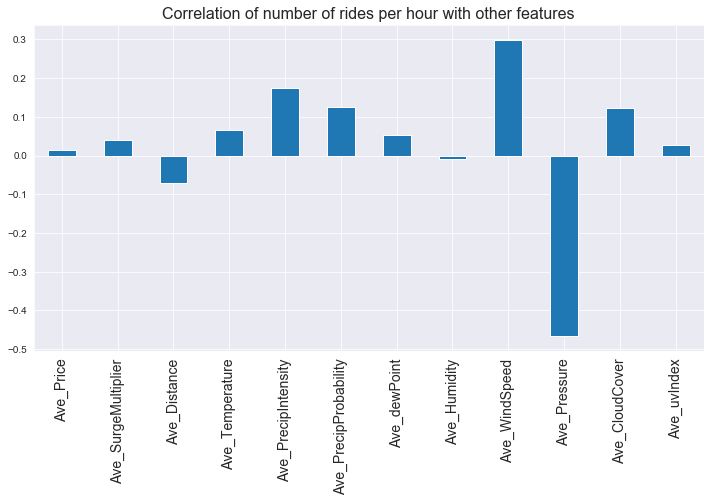

In [21]:
plt.figure(figsize=(12,6))
plt.title('Correlation of number of rides per hour with other features', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
Rides_hourly.corr()['NumberOfRides'].drop('NumberOfRides').plot(kind='bar')

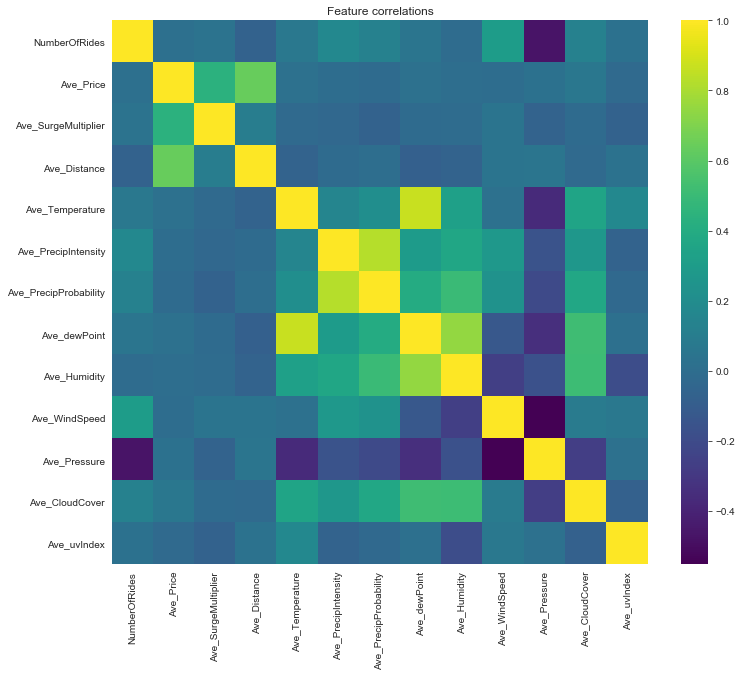

In [22]:
plt.figure(figsize=(12,10))
plt.title('Feature correlations')
sns.heatmap(Rides_hourly.corr(), cmap='viridis') #, annot=True)